In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
filepath = '/content/gdrive/MyDrive' + '/Colab Notebooks/csv/'

df_data = pd.read_csv(filepath + 'BostonHousing.csv')
print(df_data.shape)

Mounted at /content/gdrive
(506, 14)


In [2]:
bh_data = np.array(df_data.values, dtype=np.float32)

x_train = np.array(bh_data[:400, :13], dtype=np.float32).reshape(-1, 13)
y_train = np.array(bh_data[:400, 13], dtype=np.float32).reshape(-1, 1)

x_test = np.array(bh_data[400:, :13], dtype=np.float32).reshape(-1, 13)
y_test = np.array(bh_data[400:, 13], dtype=np.float32).reshape(-1, 1)

mu = np.mean(x_train, axis=0)
sig = np.std(x_train, axis=0)

x_train = (x_train - mu) / sig
x_test = (x_test - mu) / sig
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(400, 13) (400, 1) (106, 13) (106, 1)


In [3]:
class Linear:
    def __init__(self, in_features, out_features):
        self.weight = np.random.rand(in_features, out_features)
        self.bias = np.random.rand(out_features)
    
    def forward(self, x):
        self.input = x
        x = np.dot(x, self.weight) + self.bias
        return x

    def backward(self, grad_output, learning_rate):
        grad_weight = np.dot(self.input.T, grad_output)
        grad_bias = np.sum(grad_output, axis=0)
        grad_input = np.dot(grad_output, self.weight.T)

        self.weight = self.weight - learning_rate * grad_weight
        self.bias = self.bias - learning_rate * grad_bias
        return grad_input

In [4]:
class ReLU:
    def forward(self, x):
        self.input = x
        return np.maximum(x, 0)

    def backward(self, grad_output):
        grad_input = grad_output.copy()
        grad_input[self.input < 0] = 0
        return grad_input

In [5]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.layer1 = Linear(input_size, hidden_size)
        self.ReLU = ReLU()
        self.layer2 = Linear(hidden_size, output_size)
        self.learning_rate = learning_rate
    
    def forward(self, x):
        x = self.layer1.forward(x)
        x = self.ReLU.forward(x)
        x = self.layer2.forward(x)
        return x
    
    def backward(self, y_true, y_pred):
        grad_output = y_pred - y_true
        grad_output /= len(y_true)

        grad_output = self.layer2.backward(grad_output, self.learning_rate)
        grad_output = self.ReLU.backward(grad_output)
        grad_output = self.layer1.backward(grad_output, self.learning_rate)

In [6]:
def loss_function(h, y):
    err = (h - y) ** 2
    return np.mean(err)

mlp = MLP(input_size=13, hidden_size=16, output_size=1, learning_rate=1e-2)

In [7]:
epoch = 1000

losses = []
for i in range(epoch):
    y_pred = mlp.forward(x_train)
    losses.append(loss_function(y_pred, y_train))

    mlp.backward(y_train, y_pred)
losses = np.array(losses)

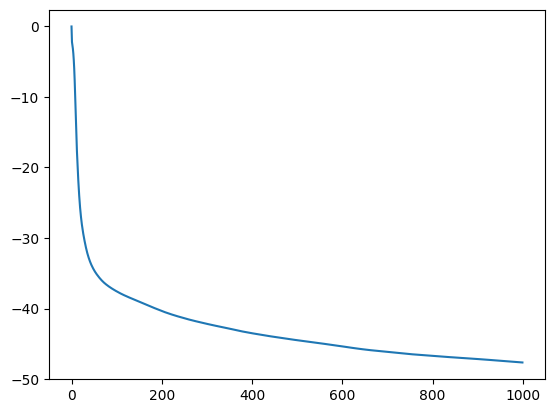

In [8]:
plt.plot(10.0 * np.log(losses / (np.max(losses + 1e-5))))
plt.show()

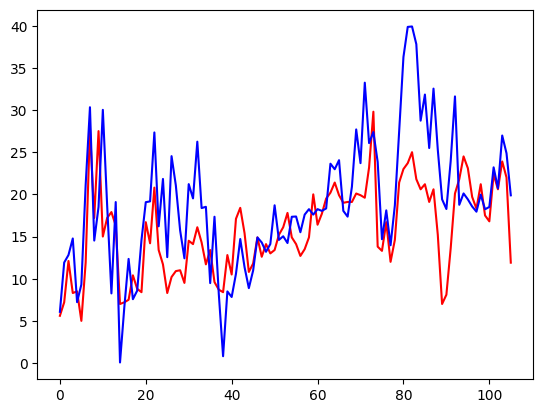

In [9]:
y_pred = mlp.forward(x_test) 
plt.plot(y_test.reshape(-1,), color="red")
plt.plot(y_pred.reshape(-1,), color="blue")
plt.show()